In [45]:
import pandas as pd
import numpy as np
data=pd.read_csv("./exported_data.csv",sep=',', decimal=".") # Считываем данные из файла
#data['Bought_Or_Not']=data['Bought_Or_Not'].applymap(np.int64)
data.astype({'Bought_Or_Not': 'int32'})
pd.Series([1, 2], dtype='int32')

data.head() 

,Bought_Or_Not,Recency,Frequency,Monetary_Value,Mean_Quantity,ActivationDate,Age,SubscribedEmail,SubscribedPush,Male
0,0.0,160.0,8.142857,251.789474,1.035088,735599,24.0,False,True,0
1,0.0,720.0,4.857143,279.647059,1.000000,735599,46.0,True,True,1
2,1.0,15.0,4.714286,398.734848,1.666667,735599,27.0,True,True,0
3,0.0,177.0,14.142857,262.737374,1.141414,735599,54.0,True,True,0
4,1.0,115.0,3.000000,393.714286,1.809524,735599,48.0,False,False,1


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# ДЕЛИМ ДАННЫЕ
X=data.drop('Bought_Or_Not',axis=1) # исключаем из данных зависимую переменную
y=data['Bought_Or_Not']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
tree = DecisionTreeClassifier(criterion='entropy', random_state=1)

# ОБУЧАЕМ ДЕРЕВО
tree.fit(X_train, y_train)

# ПРЕДСКАЗЫВАЕМ
y_pred = tree.predict(X_test)
print(y_pred[0:5])

# СЧИТАЕМ ВСЯКИЕ МЕТРИКИ
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import confusion_matrix, classification_report

acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
  mse_TREE
mse_tree = MSE(y_test, y_pred)

  rmse_TREE
rmse_tree = mse_tree**(1/2)

 Print rmse_dt
print("Test set RMSE of tree: {:.2f}".format(rmse_tree))
# СТРОИМ ГРАФИК

#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#from sklearn.tree import export_graphviz
#import pydotplus
#dot_data = StringIO()
#export_graphviz(tree, out_file=dot_data,  
#                filled=True, rounded=True,
#                special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())


In [35]:
# СЛУЧАЙНЫЙ ЛЕС
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Instantiate rf
rf = RandomForestClassifier(n_estimators=10, random_state=0,criterion='entropy' )
                           
# Fit rf to the training set            
rf.fit(X_train, y_train)
# ПРЕДСКАЗЫВАЕМ И ВЫЧИСЛЯЕМ МЕТРИКУ
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

In [39]:
# ГРАДИЕНТНЫЙ БУСТИНГ
# 
from sklearn.ensemble import GradientBoostingClassifier

# 
gb = GradientBoostingClassifier(max_depth=4,
                               n_estimators=200,
                               random_state=2)
#
gb.fit(X_train, y_train)

# 
y_pred = gb.predict(X_test)

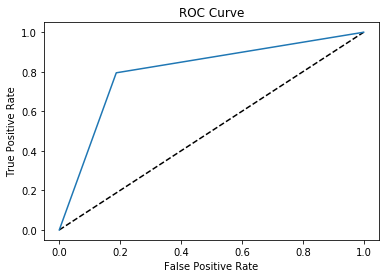

In [53]:
y_pred_prob = tree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

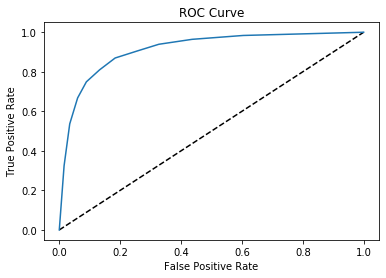

In [50]:
y_pred_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

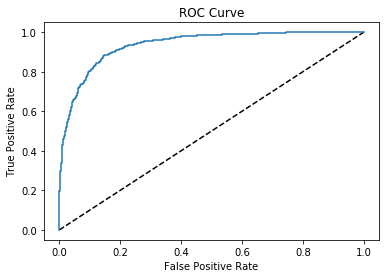

In [51]:
y_pred_prob = gb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()